No objective coefficients in model. Unclear what should be optimized


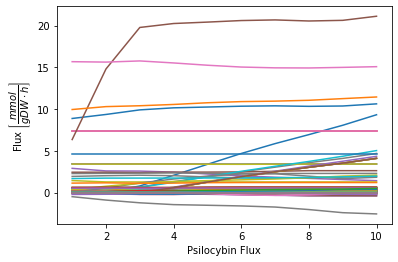

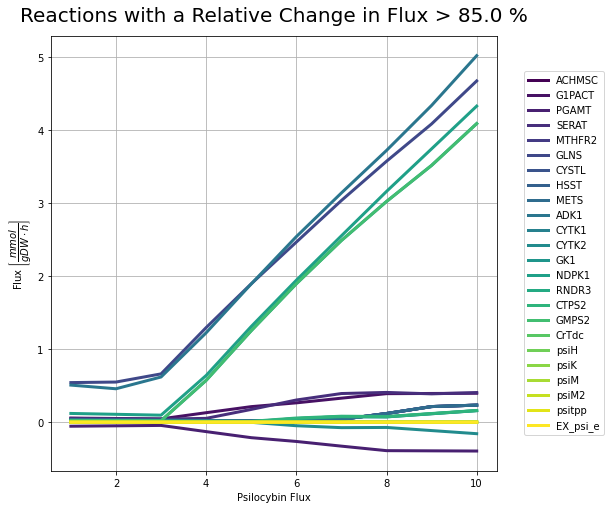

ACHMSC    ACHMSC    achms_c + cys_L_c --> ac_c + cyst_L_c + h_c
G1PACT    glucosamine-1-phosphate N-acetyltransferase    accoa_c + gam1p_c --> acgam1p_c + coa_c + h_c
PGAMT    phosphoglucosamine mutase    gam1p_c <-- gam6p_c
SERAT    serine O-acetyltransferase    accoa_c + ser_L_c --> acser_c + coa_c
MTHFR2     5,10_Methylenetetrahydrofolate reductase (NADH)    2.0 h_c + mlthf_c + nadh_c --> 5mthf_c + nad_c
GLNS    glutamine synthetase    atp_c + glu_L_c + nh4_c --> adp_c + gln_L_c + h_c + pi_c
CYSTL    cystathionine b_Lyase    cyst_L_c + h2o_c --> hcys_L_c + nh4_c + pyr_c
HSST    homoserine O-acetyltransferase    accoa_c + hom_L_c --> achms_c + coa_c
METS    methionine synthase    5mthf_c + hcys_L_c --> h_c + met_L_c + thf_c
ADK1    adenylate kinase    amp_c + atp_c <=> 2.0 adp_c
CYTK1    cytidylate kinase (CMP)    atp_c + cmp_c <=> adp_c + cdp_c
CYTK2    cytidylate kinase (dCMP)    atp_c + dcmp_c <=> adp_c + dcdp_c
GK1    guanylate kinase (GMP:ATP)    atp_c + gmp_c <=> adp_c + gdp_c


In [1]:
%run 8._FSEOF.ipynb #import data from FSEOF

In [2]:
model.objective = model.reactions.EX_psi_e #set model objective

# Production Rate

In [3]:
with model:
    psi_production = model.optimize().objective_value
    print("Max. psi production [mmol gDW^-1 h^-1]:", psi_production)
    print("Theoretical max. yield [mmol-psi / mmol-gl]:", psi_production / (-1*model.reactions.EX_glc_e.flux))

Max. psi production [mmol gDW^-1 h^-1]: 5.69299883708285e-05
Theoretical max. yield [mmol-psi / mmol-gl]: 1.2190575668271627e-05


In [4]:
with model:
    psi_production = model.optimize().objective_value
    print("Max. psi production [mmol gDW^-1 h^-1]:", psi_production)
    print("Theoretical max. yield [mmol-psi / mmol-gl]:", psi_production / (-1*model.reactions.EX_glc_e.flux))

Max. psi production [mmol gDW^-1 h^-1]: 5.69299883708285e-05
Theoretical max. yield [mmol-psi / mmol-gl]: 1.2190575668271627e-05


# List of Potential Reactions from FSEOF

In [5]:
for rx in Reactions:
    Orig = model.reactions.get_by_id(rx)
    print(Orig.id,"  ",Orig.bounds,"  ",Orig.flux)

ACHMSC    (1.22962627371827e-27, 0.537786666666667)    0.0
G1PACT    (0.0, 0.4221)    0.0
PGAMT    (-0.4221, 0.0)    0.0
SERAT    (2.59401548258117e-26, 0.80668)    0.000113859976741657
MTHFR2    (2.78611747186429e-28, 0.537786666666667)    0.000113859976741657
GLNS    (1.48889992231045e-26, 58.6038275000003)    4.800908557492051
CYSTL    (2.78624932516893e-28, 0.537786666666667)    0.000113859976741657
HSST    (0.0, 0.537786666666667)    0.0
METS    (2.7857206778097e-28, 0.537786666666667)    0.000113859976741657
ADK1    (-999.94372, 1000.0)    0.0
CYTK1    (-0.670669999998541, 58.0457174999991)    0.0
CYTK2    (-0.670669999999217, 58.0457174999961)    0.0
GK1    (-2.9986740137664e-13, 58.0457174999992)    0.0
NDPK1    (-999.94372, 1000.0)    27.00235084418228
RNDR3    (0.0, 0.670669999999217)    0.0
CTPS2    (0.0, 0.67066999999854)    0.0
GMPS2    (0.0, 19.3485724999993)    0.0
CrTdc    (0.0, 1000.0)    5.69299883708285e-05
psiH    (0.0, 1000.0)    5.69299883708285e-05
psiK    (0.0, 

# "Upregulate" by increasing bounds

In [6]:
for rx in Reactions:
    ID = model.reactions.get_by_id(rx)
    if ID.lower_bound<0:
        ID.bounds=(0.1),(ID.upper_bound*2+0.1)
    else:
        ID.bounds=(ID.lower_bound*2+0.1),(ID.upper_bound*2+0.1)

# New Bounds

In [7]:
for rx in Reactions:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.bounds)

ACHMSC    (0.1, 1.175573333333334)
G1PACT    (0.1, 0.9441999999999999)
PGAMT    (0.1, 0.1)
SERAT    (0.1, 1.71336)
MTHFR2    (0.1, 1.175573333333334)
GLNS    (0.1, 117.3076550000006)
CYSTL    (0.1, 1.175573333333334)
HSST    (0.1, 1.175573333333334)
METS    (0.1, 1.175573333333334)
ADK1    (0.1, 2000.1)
CYTK1    (0.1, 116.1914349999982)
CYTK2    (0.1, 116.1914349999922)
GK1    (0.1, 116.19143499999839)
NDPK1    (0.1, 2000.1)
RNDR3    (0.1, 1.441339999998434)
CTPS2    (0.1, 1.4413399999970802)
GMPS2    (0.1, 38.7971449999986)
CrTdc    (0.1, 2000.1)
psiH    (0.1, 2000.1)
psiK    (0.1, 2000.1)
psiM    (0.1, 2000.1)
psiM2    (0.1, 2000.1)
psitpp    (0.1, 2000.1)
EX_psi_e    (0.1, 2000.1)


# Upregulated Production Rate

In [10]:
with model:
    upregulate = model.optimize().objective_value
    print("Max. psi production [mmol gDW^-1 h^-1]:", upregulate)
    print("Theoretical max. yield [mmol-psi / mmol-gl]:", upregulate / (-1*model.reactions.EX_glc_e.flux))
    print("Growth Rate [1 / h^-1]:", (model.reactions.CG_biomass_cgl_ATCC13032.flux))

Max. psi production [mmol gDW^-1 h^-1]: 1.0996014900814042
Theoretical max. yield [mmol-psi / mmol-gl]: 0.23546070451421933
Growth Rate [1 / h^-1]: 0.0


The solver says this is infeasible, but when running it again, it says it's fine. The production rate here is certainly more desirable, and reflects that at least some of the selected genes have can be upregulated to improve psilocybin production.

In [9]:
upregulate - psi_production #ensuring a difference in production rate

1.0995445600930334